### CAO Points Notebook

Include a Jupyter notebook called cao.ipynb that contains the following.

10% A clear and concise overview of how to load CAO points information from the
CAO website into a pandas data frame, pitched as your classmates.
***

20% A detailed comparison of CAO points in 2019, 2020, and 2021 using the functionality in pandas.
***

10% Appropriate plots and other visualisations to enhance your notebook for viewers.
***

#  Introduction

This project looks at Central Applications Office data relating to candidate admission points to undergraduate courses in Ireland. Points for years 2021, 2020 and 2019 are save in different formats that adds a challenge to retrieve, consolidate and prepare it for analysis. 2021 admission points are retrieved in HTML format and requires regular expressions to be used to identify data fields and save them down omitting non useful data. 2020 admission points are in excel/CSV format and are straight forward to load using Pandas integrated functionality. 2019 points are saved in PDF format on CAO website, to work with PDF Camelot package is used. Camelot is relatively new package for tabular data extraction within PDF file. Once required data is extracted it is merged together by indexing CAO course code and joining required columns from respective year data files. Merged data is cleaned of special symbols indicating course requirements for additional tests, interviews or portfolio review for creative courses. Data is investigated to identify and plot trends between the academic years.

Project follows GMIT Fundamentals of Data Analysis module learning materials and code by Dr Ian McLoughlin. [Github](https://github.com/ianmcloughlin/cao-points/blob/main/cao-points-analysis.ipynb)

### Packages required

Python programming language is designed in computer resource conscious way- the least amount of resources is to be used every time working environment is loaded. Hence, packages are loaded to working environment only as required and specified. Packages required for this project are loaded below:

In [1]:
# Importing required packages:
# HTTP Requests
import requests as rq

# Regular Expressions
import re

# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# For URL downloads
import urllib.request as urlrq

# Working with arrays
import numpy as np

# Pyplot for plotting
import matplotlib.pyplot as plt

# Seaborn for plotting
import seaborn as sns

# Loading points from the CAO website:
***

## CAO Points for 2021
Source: http://www.cao.ie/index.php?page=points&p=2021
***
2021 points are listed on Central Applications Office website in HTML format, Requests package is used to download and save it in the working directory. Download path is specified to include date and time of data download.

In [2]:
# Getting data form CAO website
resp = rq.get("http://www2.cao.ie/points/l8.php")

HTTP has response codes to identify status of the requests, most common ones listed below where full list can be found [here.](https://thecontentworks.uk/http-status-codes-cheat-sheet/) <br>
**200: OK <br>
301: Moved Permanently <br>
302: Found <br>
401: Unauthorised <br>
403: Forbidden <br>
404: Not Found <br>
500: Internal Server Error <br>
503: Service Unavailable** <br>

In [3]:
# Confirming it is OK, looking for 200 code
resp

<Response [200]>

#### Saving original dataset

To save data we retrieve current time and date in specified format. It will be used as a part of naming convention for saving data files.

In [4]:
# Getting current date and time
now = dt.datetime.now()

# Format as a string
nowstr = now.strftime("%Y%m%d_%H%M%S")

In [5]:
# Creating a file path
pathhtml = 'data/cao2021_' + nowstr + '.html'

## Encoding/Decoding
***

Every file uses specialised encoding for contents to be displayed as intended by creator. If non-standard encoding is used, not Unicode or ISO-8859-1, there might be issues for user to open and read all characters. Local languages that have special characters often use specialised encoding. CAO data has Irish characters- letters with fada that is not decoded correctly when saving it to the drive. Using server specified encoding 'iso-8859-1' leads to issues when reflecting fada, this suggest actual encoding is different and 'cp1252' needs to be specified that contains all Irish signs for correct decoding.

Server encoding can be checked by outputting 'resp.encoding' command or by checking it manually on the website.
To check CAO website encoding following steps should be followed:
1. With internet browser open http://www2.cao.ie/points/l8.php
2. Right click on the page and choose inspect; this will open the sidebar.
3. Select Network tab and hit F5, this will refresh the website and show loaded files.
4. Selecting l8.php opens up sidebar and under Headers it is identified charset=iso-8859-1 is being used.


## CAO Website Encoding

![encoding](https://raw.githubusercontent.com/Mantvydas-data/FundamentalsofDataAnalysis/main/data/CAOdecoding.PNG)\n

In [6]:
# Confirming original server encoding as iso-8859-1
original_encoding = resp.encoding

# Setting cp1252 encoding to include Irish alphabet with fada
resp.encoding = 'cp1252'

original_encoding

'iso-8859-1'

In [7]:
# Saving original html file
with open(pathhtml, 'w') as f:
    f.write(resp.text)

# Regular Expression
***

Regular expression is used for text processing operations where text is searched by using agreed special characters and wild cards. Patterns specify sequence of alphanumeric characters, quantifiers, anchors and other expressions in required order e.g. three digits followed by dash and 3 capital letter 123ASD, that will be looked for in specified text or file. Regular expressions cheat sheet can be found [here.](https://cheatography.com/davechild/cheat-sheets/regular-expressions/)

Regular expression pattern for CAO points by line is specified to look for course code- a line starting with two capital letters followed by three digits and all following characters after that.

In [8]:
# Compiling regular expression for line matching
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

In [9]:
# The file path for the csv file.
path2021 = 'data/cao2021_csv_' + nowstr + '.csv'

Compiled sequence is used to look for course code line in the specified file in this case it is CAO website html file. Each line is checked for course code and if found line is split into different components: code, title, also points for round one and two. Function is finished by joining up components and saving data to file.

In [10]:
# Keep track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(path2021, 'w') as f:
    # Write a header row.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


**Line count for CAO 2021 points is expected at 949.**

In [11]:
# Opening 2021 CSV data with specified encoding
df2021 = pd.read_csv(path2021, encoding='cp1252')

In [12]:
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


## CAO Points for 2020
Source: https://www.cao.ie/index.php?page=points&p=2020

Source: http://www2.cao.ie/points/CAOPointsCharts2020.xlsx
***

2020 points are available in xlsx file on CAO website, it is downloaded using urllib.request package and read with Pandas.

In [13]:
# Setting URL link for 2020 CAO points
url = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

In [14]:
# File path to save original CAO 2020 file.
pathxlx = 'data/cao2020_' + nowstr + '.xlsx'

In [15]:
# urllib.request retrieves the file from URL and saves under pathxlsx
urlrq.urlretrieve(url, pathxlx)

('data/cao2020_20220102_005106.xlsx',
 <http.client.HTTPMessage at 0x1ca51ec3550>)

In [16]:
# Excel file has extra lines that are not required, so first 10 rows are skipped
df2020 = pd.read_excel(url, skiprows=10)

In [17]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Spot checking one row
df2020.iloc[128]

CATEGORY (i.e.ISCED description)       Mathematics and statistics
COURSE TITLE                                Mathematical Sciences
COURSE CODE2                                                CK407
R1 POINTS                                                     566
R1 Random *                                                   NaN
R2 POINTS                                                     565
R2 Random*                                                      *
EOS                                                           565
EOS Random *                                                  NaN
EOS Mid-point                                                 601
LEVEL                                                           8
HEI                                 University College Cork (NUI)
Test/Interview #                                              NaN
avp                                                           NaN
v                                                             NaN
Column1   

In [19]:
# Spot checking last row
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [20]:
# File path for saving 2020 data
path2020 = 'data/cao2020' + nowstr + '.csv'

In [21]:
# Saving 2020 data to csv
df2020.to_csv(path2020)

## CAO Points for 2019 
Source: https://www.cao.ie/index.php?page=points&p=2019 <br>
Source: http://www2.cao.ie/points/lvl8_19.pdf
***
2019 points are in PDF format and needs Camelot package for reading and extracting table data.

In [22]:
# Importing Camelot package 
import camelot

# Reading PDF file and saving to df variable
df = camelot.read_pdf('http://www2.cao.ie/points/lvl8_19.pdf', pages='all')

df

<TableList n=18>

Camelot results is a table for each PDF page separately- 18 in total, results needs to be concatenated together into one dataframe for 2019.

In [23]:
# A list of tables split to be in line with Python style guide
alltables = [
    df[0].df, df[1].df, df[2].df, df[3].df, df[4].df, df[5].df,
    df[6].df, df[7].df, df[8].df, df[9].df, df[10].df, df[11].df,
    df[12].df, df[13].df, df[14].df, df[15].df, df[16].df, df[17].df
]

# Merging tables together
df2019 = pd.concat(alltables)

2019 CAO has end of season (EOS) and mid points and would be slightly different to other years as EOS would not always be the same as round one points across all the years, although after high-level spot-checking divergence for those that actually differ is only a couple of points and will be used as round one points for this exercise.

In [24]:
# File path for saving 2020 data
path2019 = 'data/cao2019' + nowstr + '.csv'

In [25]:
# Saving 2019 data to csv
df2019.to_csv(path2019)

# Joining Data
***
To get data in one file, required columns will be identified and renamed for consistency and easier comprehension. Points will be joined by specifying index column- code.

In [26]:
# Selecting required columns from 2021 dataframe
courses2021 = df2021[['code', 'title']]

Data needs to be reviewed to confirm all data points. 2020 CAO points data has level 6, 7 and 8 together in as one data file, that needs to be filtered out before merging with 2021 and 2019 data to avoid misrepresentation. Alternatively, level 6 and 7 courses can be removed after all data is merged by removing all Nan values, as only level 8 courses will get matched. Although, only courses constantly present across all years will be left removing data for courses that were available just some of the year.

In [27]:
# Selecting only level 8 courses from 2020 data
lvl8df2020 = df2020[df2020['LEVEL'] == 8]

lvl8df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Arts,Arts (options),WD200,AQA,NaN,AQA,NaN,AQA,NaN,336,...,avp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Expected 2020 level 8 courses are 1027 as confirmed to filtered excel file.**

In [28]:
# Selecting required columns from 2020 dataframe
courses2020 = lvl8df2020[['COURSE CODE2','COURSE TITLE']]
# Renaming columns to have same names across all years
courses2020.columns = ['code', 'title']

CAO 2019 points data has rows with only institution name, this will be removed by assigning NAN value to empty fields and removing all rows containing NAN under course code.

In [29]:
# Selecting required columns from 2019 dataframe 
courses2019 = df2019[[0,1]]

# Excluding first row
courses2019 = courses2019[1:966]

# Creating NAN value
nan_value = float("NaN")

# Replacing empty values with NAN and dropping them
courses2019.replace('', nan_value, inplace=True)
courses2019.dropna(subset = [0], inplace=True)

# Renaming columns to have same names across all years
courses2019.columns = ['code', 'title']
courses2019

,code,title
2,AL801,Software Design with Virtual Reality and Gaming
3,AL802,Software Design with Cloud Computing
4,AL803,Software Design with Mobile Apps and Connected...
5,AL805,Network Management and Cloud Infrastructure
6,AL810,Quantity Surveying
...,...,...
37,WD200,Arts (options)
38,WD210,Software Systems Development
39,WD211,Creative Computing
40,WD212,Recreation and Sport Management


**930 rows confirmed courses verified to filtered excel data**

In [30]:
# Joining 3 years of CAO data
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
2901,WD200,Arts (options)
2902,WD210,Software Systems Development
2903,WD211,Creative Computing
2904,WD212,Recreation and Sport Management


In [31]:
# Sorting values by course code
allcourses.sort_values('code')

,code,title
175,AC120,International Business
2144,AC120,International Business
949,AC120,International Business
176,AC137,Liberal Arts
2145,AC137,Liberal Arts
...,...,...
1975,WD230,Mechanical and Manufacturing Engineering
946,WD230,Mechanical and Manufacturing Engineering
2905,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [32]:
# Returns a copy of the data frame with duplicates removed - based only on code.
allcourses = allcourses.drop_duplicates(subset=['code'], keep='first')

allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
2835,SG441,Environmental Science
2840,SG446,Applied Archaeology
2846,TL803,Music Technology
2849,TL812,Computing with Digital Media


---



In [33]:
# Specifying required columns from each year data and renaming them for uniformity 
# 2021
df2021_r1 = df2021[['code', 'pointsR1']]
df2021_r1.columns = ['code', 'points_r1_2021']

# 2020
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'points_r1_2020']

# 2019
df2019_r1 = df2019[[0, 2]]
df2019_r1.columns = ['code', 'points_r1_2019']

Each year data is indexed by course code for points to be joined on it.

In [34]:
# Setting index to code column on each dataframe
allcourses.set_index('code', inplace=True)
df2021_r1.set_index('code', inplace=True)
df2020_r1.set_index('code', inplace=True)
df2019_r1.set_index('code', inplace=True)

Data is joined to allcourses data frame.

In [35]:
# Joining 2021, 2020 and 2019 points to all data 
allcourses = allcourses.join(df2021_r1)
allcourses = allcourses.join(df2020_r1)
allcourses = allcourses.join(df2019_r1)
allcourses

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AC120,International Business,294,209,234
AC137,Liberal Arts,271,252,252
AD101,First Year Art and Design (Common Entry portfo...,#554,#+matric,# +matric 550
AD102,Graphic Design and Moving Image Design (portfo...,#538,#+matric,# +matric 635
AD103,Textile and Surface Design and Jewellery and O...,#505,#+matric,# +matric 545
...,...,...,...,...
WD211,Creative Computing,270,271,275
WD212,Recreation and Sport Management,262,270,274
WD230,Mechanical and Manufacturing Engineering,230,253,273


Some of the points has extra data that needs to be cleaned up, it is replaced by # that identifies additional test/interview/portfolio requirement for the course. These courses will be identified as Boolean value column for each year after # character will be removed. <br>


In [36]:
# Replacing values '#+matric' with #
allcourses.replace(regex=["#\+matric"], value="#", inplace=True)

# Replacing values '# +matric ' with #
allcourses.replace(regex=["#\s\+matric\s"], value="#", inplace=True)

In [37]:
allcourses

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AC120,International Business,294,209,234
AC137,Liberal Arts,271,252,252
AD101,First Year Art and Design (Common Entry portfo...,#554,#,#550
AD102,Graphic Design and Moving Image Design (portfo...,#538,#,#635
AD103,Textile and Surface Design and Jewellery and O...,#505,#,#545
...,...,...,...,...
WD211,Creative Computing,270,271,275
WD212,Recreation and Sport Management,262,270,274
WD230,Mechanical and Manufacturing Engineering,230,253,273


In [38]:
# Checking if Irish characters are displayed correctly
allcourses.iloc[569]

title             Na Dána (Gaeilge agus Léann an Aistriúcháin)
points_r1_2021                                             NaN
points_r1_2020                                             409
points_r1_2019                                             330
Name: GY107, dtype: object

In [39]:
# Checking points by year to include # for the courses, saved as Boolean column
allcourses['addtest2021'] = np.where(allcourses['points_r1_2021'].astype('str').str.contains('#', regex=True), True, False)
allcourses['addtest2020'] = np.where(allcourses['points_r1_2020'].astype('str').str.contains('#', regex=True), True, False)
allcourses['addtest2019'] = np.where(allcourses['points_r1_2019'].astype('str').str.contains('#', regex=True), True, False)

allcourses

,title,points_r1_2021,points_r1_2020,points_r1_2019,addtest2021,addtest2020,addtest2019
code,,,,,,,
AC120,International Business,294,209,234,False,False,False
AC137,Liberal Arts,271,252,252,False,False,False
AD101,First Year Art and Design (Common Entry portfo...,#554,#,#550,True,True,True
AD102,Graphic Design and Moving Image Design (portfo...,#538,#,#635,True,True,True
AD103,Textile and Surface Design and Jewellery and O...,#505,#,#545,True,True,True
...,...,...,...,...,...,...,...
WD211,Creative Computing,270,271,275,False,False,False
WD212,Recreation and Sport Management,262,270,274,False,False,False
WD230,Mechanical and Manufacturing Engineering,230,253,273,False,False,False


#### CAO courses have signs added to points identifying additional admission requirements <br>
**\***    Not all on this points score were offered places <br>
**\#**    Test / Interview / Portfolio / Audition <br>
**AQA**   All qualified applicants <br>
**v**    New competition for available places <br>

In [40]:
# Removing additional symbols after noting required data
# All hash symbols in the values are in front of numbers, therefore replacing it with 0 would not distort values
allcourses.replace(regex=["#"], value="0", inplace=True)
allcourses.replace(regex=["\*"], value="", inplace=True)
allcourses.replace(regex=["AQA"], value="", inplace=True)

In [41]:
# Checking allcourses dataframe value data types
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1214 entries, AC120 to WD232
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1214 non-null   object
 1   points_r1_2021  928 non-null    object
 2   points_r1_2020  1008 non-null   object
 3   points_r1_2019  930 non-null    object
 4   addtest2021     1214 non-null   bool  
 5   addtest2020     1214 non-null   bool  
 6   addtest2019     1214 non-null   bool  
dtypes: bool(3), object(4)
memory usage: 51.0+ KB


Looking at allcourses data, CAO points is an object and will need to be converted to numerical values.

In [42]:
# Converting 2021, 2020 and 2019 points to numerical values.
allcourses['points_r1_2021'] = pd.to_numeric(allcourses['points_r1_2021'], errors ='coerce')
allcourses['points_r1_2020'] = pd.to_numeric(allcourses['points_r1_2020'], errors ='coerce')
allcourses['points_r1_2019'] = pd.to_numeric(allcourses['points_r1_2019'], errors ='coerce')

allcourses

,title,points_r1_2021,points_r1_2020,points_r1_2019,addtest2021,addtest2020,addtest2019
code,,,,,,,
AC120,International Business,294.0,209.0,234.0,False,False,False
AC137,Liberal Arts,271.0,252.0,252.0,False,False,False
AD101,First Year Art and Design (Common Entry portfo...,554.0,0.0,550.0,True,True,True
AD102,Graphic Design and Moving Image Design (portfo...,538.0,0.0,635.0,True,True,True
AD103,Textile and Surface Design and Jewellery and O...,505.0,0.0,545.0,True,True,True
...,...,...,...,...,...,...,...
WD211,Creative Computing,270.0,271.0,275.0,False,False,False
WD212,Recreation and Sport Management,262.0,270.0,274.0,False,False,False
WD230,Mechanical and Manufacturing Engineering,230.0,253.0,273.0,False,False,False


In [43]:
# Converting zero values to nan for it to be excluded from data statistics
allcourses = allcourses.replace(0, np.nan)

allcourses

,title,points_r1_2021,points_r1_2020,points_r1_2019,addtest2021,addtest2020,addtest2019
code,,,,,,,
AC120,International Business,294.0,209.0,234.0,False,False,False
AC137,Liberal Arts,271.0,252.0,252.0,False,False,False
AD101,First Year Art and Design (Common Entry portfo...,554.0,NaN,550.0,True,True,True
AD102,Graphic Design and Moving Image Design (portfo...,538.0,NaN,635.0,True,True,True
AD103,Textile and Surface Design and Jewellery and O...,505.0,NaN,545.0,True,True,True
...,...,...,...,...,...,...,...
WD211,Creative Computing,270.0,271.0,275.0,False,False,False
WD212,Recreation and Sport Management,262.0,270.0,274.0,False,False,False
WD230,Mechanical and Manufacturing Engineering,230.0,253.0,273.0,False,False,False


In [44]:
# Saving allcourses to excel file
allcourses.to_excel('data/allcourseslast.xlsx')

# Analysis and Point Comparison
***

In [45]:
print("Dimensions of allcourses dataframe is: rows {} columns." .format(allcourses.shape))

Dimensions of allcourses dataframe is: rows (1214, 7) columns.


In [46]:
# Running info function
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1214 entries, AC120 to WD232
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1214 non-null   object 
 1   points_r1_2021  923 non-null    float64
 2   points_r1_2020  989 non-null    float64
 3   points_r1_2019  915 non-null    float64
 4   addtest2021     1214 non-null   bool   
 5   addtest2020     1214 non-null   bool   
 6   addtest2019     1214 non-null   bool   
dtypes: bool(3), float64(3), object(1)
memory usage: 51.0+ KB


allcourses data has 1214 index entries starting with AC120 and finishing with WD232. <br>
There are 7 columns with different data types: title has 1214 non-null values with data type as object; <br>
points_r1_2021, points_r1_2020 and points_r1_2019 have 923, 989 and 915 non-null values respectively with data type as float64; <br>
addtest2021, addtest2020 and addtest2019 all have 1214 non-null values with data type as bool. <br>

In [47]:
# Running describe function for descriptive statistics
allcourses.describe(include='all')

,title,points_r1_2021,points_r1_2020,points_r1_2019,addtest2021,addtest2020,addtest2019
count,1214,923.000000,989.000000,915.000000,1214,1214,1214
unique,856,NaN,NaN,NaN,2,2,2
top,Accounting and Finance,NaN,NaN,NaN,False,False,False
freq,15,NaN,NaN,NaN,1133,1192,1119
mean,NaN,407.666306,394.300303,377.156284,NaN,NaN,NaN
std,NaN,128.706224,126.135161,125.310322,NaN,NaN,NaN
min,NaN,57.000000,55.000000,55.000000,NaN,NaN,NaN
25%,NaN,303.000000,301.000000,290.000000,NaN,NaN,NaN
50%,NaN,391.000000,370.000000,349.000000,NaN,NaN,NaN
75%,NaN,499.000000,476.000000,441.000000,NaN,NaN,NaN


Describe function outputs summary of descriptive statistics for numerical columns by default or all columns if 'include='all'. <br>
Each parameter can also be called separately with their respective functions e.g. .mean(), .values_count(). <br>
Describe outputs count of non-null values, minimum and maximum values by column, mean and standard deviation, also percentiles. <br>
Where non numeric columns are described with total count of values, count of unique values, most frequent or top value and its frequency. <br>

Out of 1214- 856 are unique course titles where Accounting and Finance being top reoccurring course observed 15 times. <br> Columns addtest2021, addtest2020 and addtest2019 has True or False Boolean values only indicating courses that required additional test/interview or portfolio. Additional assessments were required on 81 courses in 2021, 22 in 2020 and 95 in 2019. <br>
CAO points in 2021 had a mean value of 407.7 with standard deviation of 128.7. Minimum points were 57 up to maximum of 1028. <br>
Points in 2020 had a mean value of 394.3 with standard deviation of 126.1. Minimum points were 55 up to maximum of 1088. <br>
2019 points had a mean value of 377.2 with standard deviation of 125.3. Minimum points were 55 up to maximum of 979. <br>
Descriptive statistics indicates year on year point depreciation across each threshold: mean, 25%, 50% and 75%.

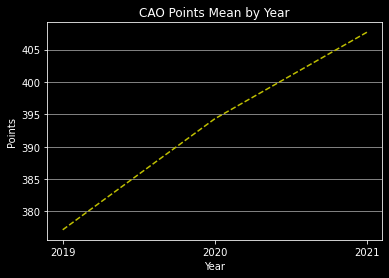

In [48]:
# Plot yearly mean of points

# Specifying required values
y2021= allcourses['points_r1_2021'].mean()
y2020= allcourses['points_r1_2020'].mean()
y2019= allcourses['points_r1_2019'].mean()

y = (y2021, y2020, y2019)
x = (2021, 2020, 2019)

# Setting plot style to dark background
plt.style.use('dark_background')

# Setting plot parameters and colours
plt.plot(x, y, color ='y', ls='--') 
plt.xticks([2021, 2020, 2019])
plt.grid(axis='y', c='white', lw='0.5')
plt.title("CAO Points Mean by Year")
plt.ylabel("Points")
plt.xlabel("Year")
plt.show()


Above plot shows CAO points mean increase from year 2019 to 2021.

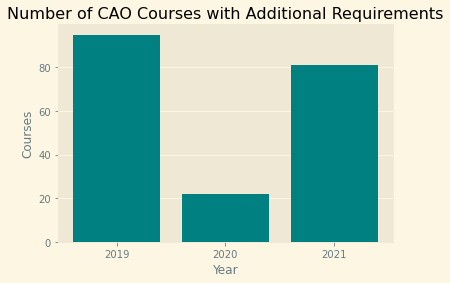

In [49]:
# Number of courses that require additional test/interview

# Plot style with darkgrid 
plt.style.use('Solarize_Light2')

# Total values of courses with assessments
add2021= sum(allcourses['addtest2021'] == True)
add2020= sum(allcourses['addtest2020'] == True)
add2019= sum(allcourses['addtest2019'] == True)

y= [add2021, add2020, add2019]
x = (2021, 2020, 2019)

# Setting plot parameters and colours
plt.bar(x, y, color='teal')
plt.xticks([2021, 2020, 2019])
plt.grid(axis='x', c='black',)
plt.title("Number of CAO Courses with Additional Requirements", color='black')
plt.ylabel("Courses")
plt.xlabel("Year")
plt.show()

Bar plot above shows CAO courses with additional Test / Interview / Portfolio / Audition for years 2019, 2020 and 2021.

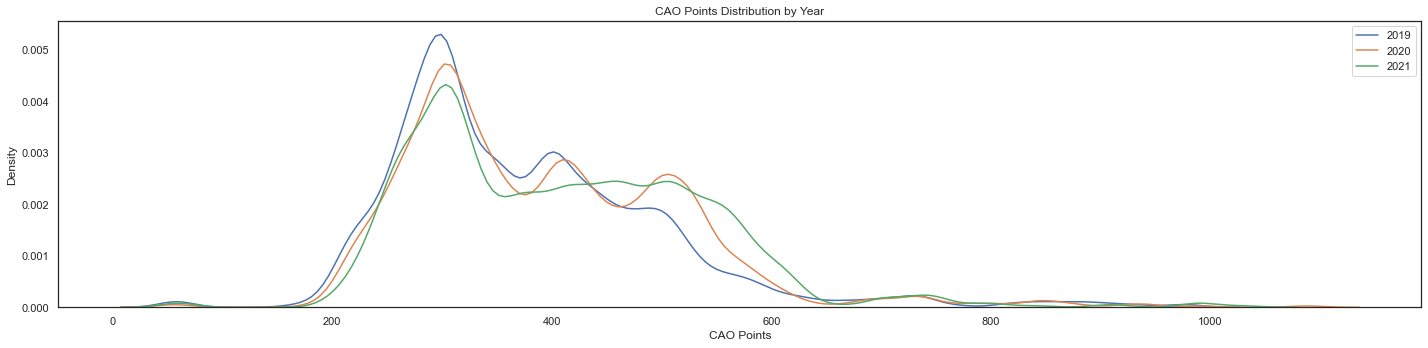

In [50]:
# KDE line plot of points distribution per year

# Seaborn plot style- white
sns.set_theme(style="white")
plt.figure(figsize=(20,5))

# Setting plot parameters
y = (2021, 2020, 2019)
sns.kdeplot(allcourses['points_r1_2019'], bw_adjust= 0.5, label='2019')
sns.kdeplot(allcourses['points_r1_2020'], bw_adjust= 0.5, label='2020')
sns.kdeplot(allcourses['points_r1_2021'], bw_adjust= 0.5, label='2021')
plt.legend()
plt.title('CAO Points Distribution by Year')
plt.xlabel("CAO Points")

plt.tight_layout()
plt.show()

From above plot it is visible less of 2021 courses were in ~300 points range, while there were more in 420 to 620. 2019 and 2020 were in line except 490 to 610 points range where in 2020 there were with more courses requiring higher points.

### Bibliography

Camelot-py.readthedocs.io. 2022. Camelot: PDF Table Extraction for Humans — Camelot 0.10.1 documentation. [online] Available at: <https://camelot-py.readthedocs.io/en/master/index.html> [Accessed 2 January 2022]. <br>
Custer, C., 2020. Tutorial: Add a Column to a Pandas DataFrame Based on an If-Else Condition. [online] Dataquest.io. Available at: <https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/> [Accessed 2 January 2022]. <br>
Du, F., 2019. Extract tabular data from PDF with Camelot Using Python. [online] Youtube.com. Available at: <https://www.youtube.com/watch?v=LoiHI-IB3lY> [Accessed 2 January 2022]. <br>
Dukakis, A., 2019. HTTP Status Codes Cheat Sheet. [online] The Content Works. Available at: <https://thecontentworks.uk/http-status-codes-cheat-sheet/> [Accessed 2 January 2022]. <br>
GeeksforGeeks. 2021. Create a Pandas DataFrame from Lists - GeeksforGeeks. [online] Available at: <https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/> [Accessed 2 January 2022]. <br>
Kite.com. n.d. How to drop empty rows from a Pandas dataframe in Python. [online] Available at: <https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python> [Accessed 2 January 2022]. <br>
Matplotlib.org. n.d. Changes to the default style — Matplotlib 3.5.1 documentation. [online] Available at: <https://matplotlib.org/stable/users/prev_whats_new/dflt_style_changes.html> [Accessed 2 January 2022]. <br>
Mcloughlin, I., 2022. CAO Points Analysis. [online] GitHub. Available at: <https://github.com/ianmcloughlin/cao-points/blob/main/cao-points-analysis.ipynb> [Accessed 2 January 2022]. <br>
Mcloughlin, I., 2022. Regular Expressions. [online] Nbviewer.org. Available at: <https://nbviewer.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/main/regex.ipynb> [Accessed 2 January 2022]. <br>
Pandas.pydata.org. n.d. pandas.to_numeric — pandas 1.3.5 documentation. [online] Available at: <https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html> [Accessed 2 January 2022]. <br>
Severo, D., 2019. Handling Time-series in Pandas and Numpy.. [online] Dsevero.com. Available at: <https://dsevero.com/posts/pandas/> [Accessed 2 January 2022]. <br>
Stack Overflow. 2012. How to replace NaN values by Zeroes in a column of a Pandas Dataframe?. [online] Available at: <https://stackoverflow.com/questions/13295735/how-to-replace-nan-values-by-zeroes-in-a-column-of-a-pandas-dataframe> [Accessed 2 January 2022]. <br>
Stack Overflow. 2013. How do I select rows from a DataFrame based on column values?. [online] Available at: <https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values> [Accessed 2 January 2022]. <br>
Stack Overflow. 2013. How to filter rows in pandas by regex. [online] Available at: <https://stackoverflow.com/questions/15325182/how-to-filter-rows-in-pandas-by-regex> [Accessed 2 January 2022]. <br>
Stack Overflow. 2019. Camelot is reading only the first page of the pdf. [online] Available at: <https://stackoverflow.com/questions/56777241/camelot-is-reading-only-the-first-page-of-the-pdf> [Accessed 2 January 2022]. <br>
van Rossum, G., Warsaw, B. and Coghlan, N., 2001. PEP 8 -- Style Guide for Python Code. [online] Python.org. Available at: <https://www.python.org/dev/peps/pep-0008/> [Accessed 2 January 2022]. <br>
w3resource. 2020. Pandas DataFrame: - info() function - w3resource. [online] Available at: <https://www.w3resource.com/pandas/dataframe/dataframe-info.php> [Accessed 2 January 2022]. <br>


# END.